In [19]:
# Importar las bibliotecas necesarias
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
# Cargar el dataframe de riesgo crediticio previamente trabajado con las tareas necesarias de preprocesamiento
df = pd.read_csv('estandarizado.csv')

In [21]:
# Dividir el dataset en muestras para entrenamiento y muestras para pruebas
y = pd.DataFrame(df.pop('loan_status'))
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [22]:
# Construir la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Visualizar un resumen del modelo generado
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1728      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3841 (15.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10
815/815 [==============================] - 1s 694us/step - loss: 0.3508 - accuracy: 0.8594 - val_loss: 0.2880 - val_accuracy: 0.8909
Epoch 2/10
815/815 [==============================] - 0s 612us/step - loss: 0.2923 - accuracy: 0.8956 - val_loss: 0.2654 - val_accuracy: 0.9068
Epoch 3/10
815/815 [==============================] - 1s 624us/step - loss: 0.2731 - accuracy: 0.9048 - val_loss: 0.2546 - val_accuracy: 0.9111
Epoch 4/10
815/815 [==============================] - 0s 600us/step - loss: 0.2609 - accuracy: 0.9098 - val_loss: 0.2535 - val_accuracy: 0.9107
Epoch 5/10
815/815 [==============================] - 1s 617us/step - loss: 0.2540 - accuracy: 0.9132 - val_loss: 0.2378 - val_accuracy: 0.9185
Epoch 6/10
815/815 [==============================] - 0s 598us/step - loss: 0.2490 - accuracy: 0.9145 - val_loss: 0.2331 - val_accuracy: 0.9223
Epoch 7/10
815/815 [==============================] - 0s 602us/step - loss: 0.2433 - accuracy: 0.9169 - val_loss: 0.2313 - val_accuracy:

In [24]:
# Realiza predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Convierte las probabilidades (salida de la función sigmoide) a clases binarias (0 o 1)
predicted_classes = (predictions > 0.5).astype(int)

# Ahora, 'predicted_classes' contiene las predicciones binarias para cada muestra en X_test

204/204 [==============================] - 0s 317us/step


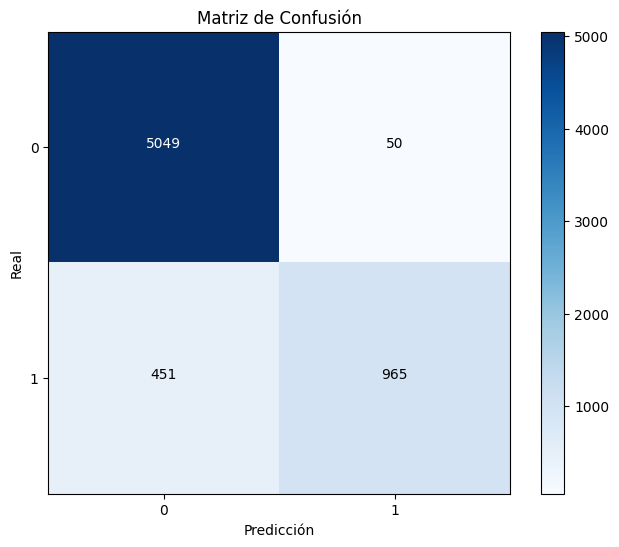

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_test, predicted_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()

classes = ['0', '1']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicción')
plt.ylabel('Real')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(
            j, 
            i, 
            format(cm[i, j], 'd'),
            horizontalalignment="center",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

plt.show()

In [27]:
from sklearn.metrics import  classification_report

# Mostrar el informe de clasificación
print('\nClassification Report:\n', classification_report(y_test, predicted_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      5099
           1       0.94      0.69      0.80      1416

    accuracy                           0.92      6515
   macro avg       0.93      0.84      0.87      6515
weighted avg       0.92      0.92      0.92      6515



In [26]:
from keras.saving import save_model

save_model(model=model, filepath='red', overwrite=True, save_format='h5')

# model.save(filepath='red', overwrite=True, save_format='h5')

/var/folders/4t/87jmczf5535396rqjf5lhq480000gn/T/ipykernel_1272/4027377081.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model=model, filepath='red', overwrite=True, save_format='h5')


In [88]:
from keras.saving import load_model
import numpy as np

my_model = load_model(filepath='red')

test = np.array([[-0.4381100644163266,1.839319174591527,-0.693416842248989,4.0207861463575965,-1.0969634277013416,0.4664805128231976,-0.4450398938729062,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0]])
display(type(test))
display(test.shape)
my_model.predict(test)
# my_model(X_test[1:2], training=False)

numpy.ndarray

(1, 26)

1/1 [==============================] - 0s 25ms/step


array([[0.00205293]], dtype=float32)